In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import os
sys.path.append("..")

In [2]:
project_id = "anan-project"
nqubit = 7

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/tanan/keys/anan-project-bq-import-sa.json"

In [3]:
from common.utils.job_result import get_result_from_bq, summary_job_result_by_time
jobs = get_result_from_bq(project_id, f"nqubit = {nqubit}")
summaries = summary_job_result_by_time(jobs)

DefaultCredentialsError: File /Users/toshifumi.anan/uzabase/work/anan-project-bq-import-sa.json was not found.

In [4]:
print(summaries)

[{'nqubit': 7, 'gate_type': 'direct', 'depth': 1, 't_type': None, 'min_time': None, 'max_time': None, 'noise_singlequbit_value': 'None', 'noise_twoqubit_value': 'None', 'constraints': 'false', 'bounds': 'false', 't_evol': None, 'cost': {'min': -8.288018893530698, 'max': -8.277717745202986, 'mean': -8.28286401128895, 'std': 0.005145849622126861}, 'iter': {'min': 903.0, 'max': 1901.0, 'mean': 1163.3, 'std': 327.11895389903657}}, {'nqubit': 7, 'gate_type': 'direct', 'depth': 2, 't_type': None, 'min_time': None, 'max_time': None, 'noise_singlequbit_value': 'None', 'noise_twoqubit_value': 'None', 'constraints': 'false', 'bounds': 'false', 't_evol': None, 'cost': {'min': -8.337577710048599, 'max': -8.33329176875915, 'mean': -8.334257121430092, 'std': 0.001163100711667012}, 'iter': {'min': 2341.0, 'max': 13101.0, 'mean': 5530.0, 'std': 2914.4426568385247}}, {'nqubit': 7, 'gate_type': 'direct', 'depth': 3, 't_type': None, 'min_time': None, 'max_time': None, 'noise_singlequbit_value': 'None', '

In [5]:
## x axis: layer, y axis: expectation value
plot_list = {}
for summary in summaries:
    if summary['t_type'] == 'random':
        if ("%s-%s-%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])) not in plot_list.keys():
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['depth']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-cost-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['cost']['min']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-cost-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['cost']['mean']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['iter']['min']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-max" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['iter']['max']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['iter']['mean']]
        else:
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['depth'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-cost-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['cost']['min'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-cost-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['cost']['mean'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['iter']['min'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-max" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['iter']['max'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['iter']['mean'])

def create_expectation_graph(title, y_min=-9.0, y_max=-5.0):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("expectation value")
    plt.ylim(y_min, y_max)

def create_iteration_graph(title):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['figure.figsize'] = (3.5, 3.5)
    plt.rcParams['font.family']= 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    if title is not None:
        plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("iteration")

## 初期パラメータの依存性について

### 前提条件
- constraintsなし
- boundsなし

### time parameter
- `-1 to 1`
- `-2 to 2`
- `-10 to 10`

### 結果
- 初期値を t = -1 to 1 のとき、 0 to 2 のときは有意な差は見られない
- -10 to 10の場合、平均、最小ともに結果が悪化している
- 初期値を取る際は小さめの値を設定すると安定した結果が得られる

In [6]:
# key output
plot_list.keys()

dict_keys(['indirect_xy--2-2-None-None-false-false-None-depth', 'indirect_xy--2-2-None-None-false-false-None-cost-min', 'indirect_xy--2-2-None-None-false-false-None-cost-mean', 'indirect_xy--2-2-None-None-false-false-None-iter-min', 'indirect_xy--2-2-None-None-false-false-None-iter-max', 'indirect_xy--2-2-None-None-false-false-None-iter-mean', 'indirect_xy--2-2-None-None-false-true-None-depth', 'indirect_xy--2-2-None-None-false-true-None-cost-min', 'indirect_xy--2-2-None-None-false-true-None-cost-mean', 'indirect_xy--2-2-None-None-false-true-None-iter-min', 'indirect_xy--2-2-None-None-false-true-None-iter-max', 'indirect_xy--2-2-None-None-false-true-None-iter-mean', 'indirect_xy--2-2-None-None-true-true-"absolute"-depth', 'indirect_xy--2-2-None-None-true-true-"absolute"-cost-min', 'indirect_xy--2-2-None-None-true-true-"absolute"-cost-mean', 'indirect_xy--2-2-None-None-true-true-"absolute"-iter-min', 'indirect_xy--2-2-None-None-true-true-"absolute"-iter-max', 'indirect_xy--2-2-None-None

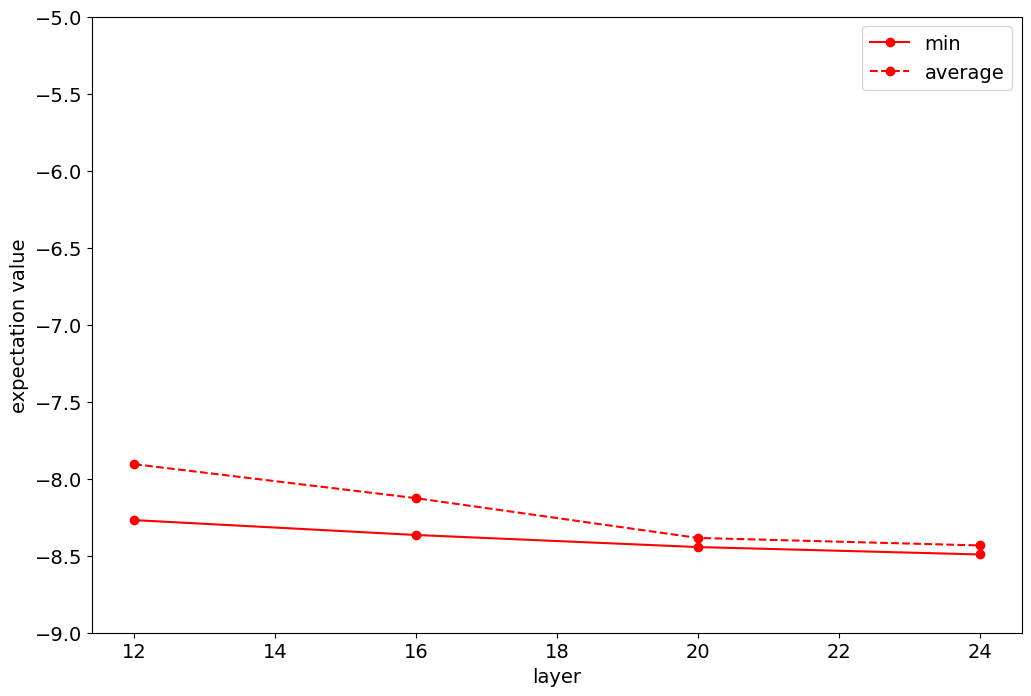

In [8]:
# compare to direct

create_expectation_graph("")
# plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xy--1-1-None-None-false-false-None-depth'], plot_list['indirect_xy--1-1-None-None-false-false-None-cost-min'], marker='o', color='red', label='min')
plt.plot(plot_list['indirect_xy--1-1-None-None-false-false-None-depth'], plot_list['indirect_xy--1-1-None-None-false-false-None-cost-mean'], marker='o', color='red', linestyle="dashed", label='average')
plt.legend()
plt.savefig('./images/indirect_xy_unbounds_expectation_t1.png')

## 境界条件及び虚時間発展の依存性

### 前提条件
- constraintsなし
- boundsあり

### time parameter
- `-2 to 2`（逆時間発展を許容している）
- `0 to 2`
<!-- - `0 to 10` -->

### 結果
- boundsを設定することで、全体的に平均値と最小値の分散が大きくなった
- 最小値自体は、boundsなしの時と大きな差はない
- 逆時間発展を許容した場合には、layerが増えるにつれて分散が小さくなり、精度が良くなる

　　前述のグラフと総合すると、、、**小さな初期パラメータを設定 & 逆時間発展を許容した場合に精度がよくなる**

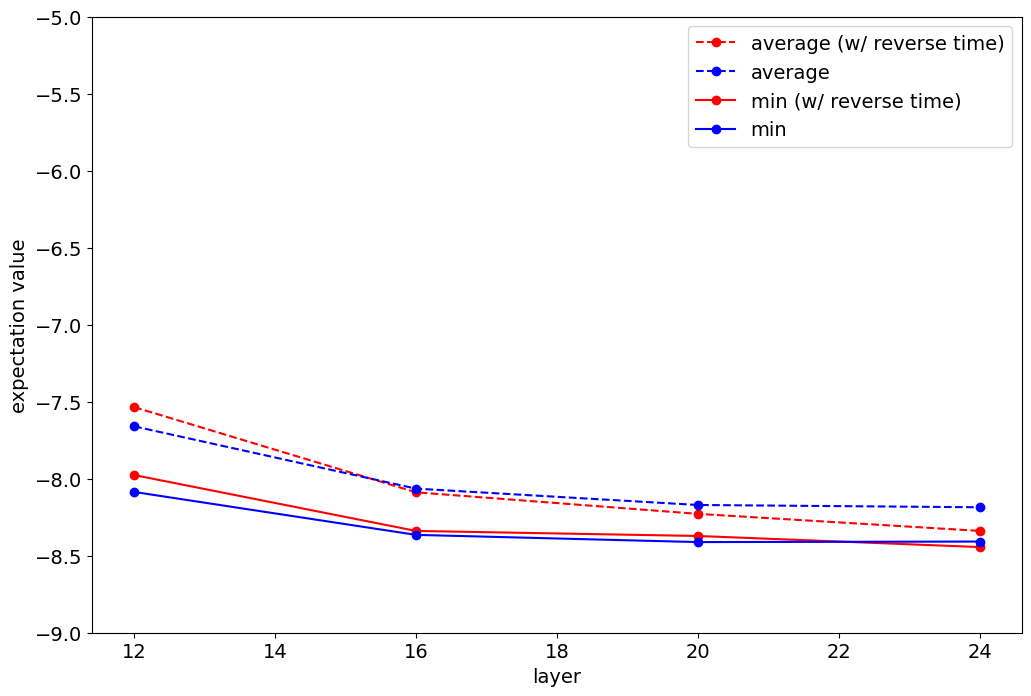

In [9]:
# with bounds
create_expectation_graph("")
# plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xy--2-2-None-None-false-true-None-depth'], plot_list['indirect_xy--2-2-None-None-false-true-None-cost-mean'], marker='o', color='red', linestyle="dashed", label='average (w/ reverse time)')
plt.plot(plot_list['indirect_xy-0-2-None-None-false-true-None-depth'], plot_list['indirect_xy-0-2-None-None-false-true-None-cost-mean'], marker='o', color='blue', linestyle="dashed", label='average')
plt.plot(plot_list['indirect_xy--2-2-None-None-false-true-None-depth'], plot_list['indirect_xy--2-2-None-None-false-true-None-cost-min'], marker='o', color='red', label='min (w/ reverse time)')
plt.plot(plot_list['indirect_xy-0-2-None-None-false-true-None-depth'], plot_list['indirect_xy-0-2-None-None-false-true-None-cost-min'], marker='o', color='blue', label='min')

plt.legend()
plt.savefig('./images/indirect_xy_bounds_expectation_reverse_time.png')

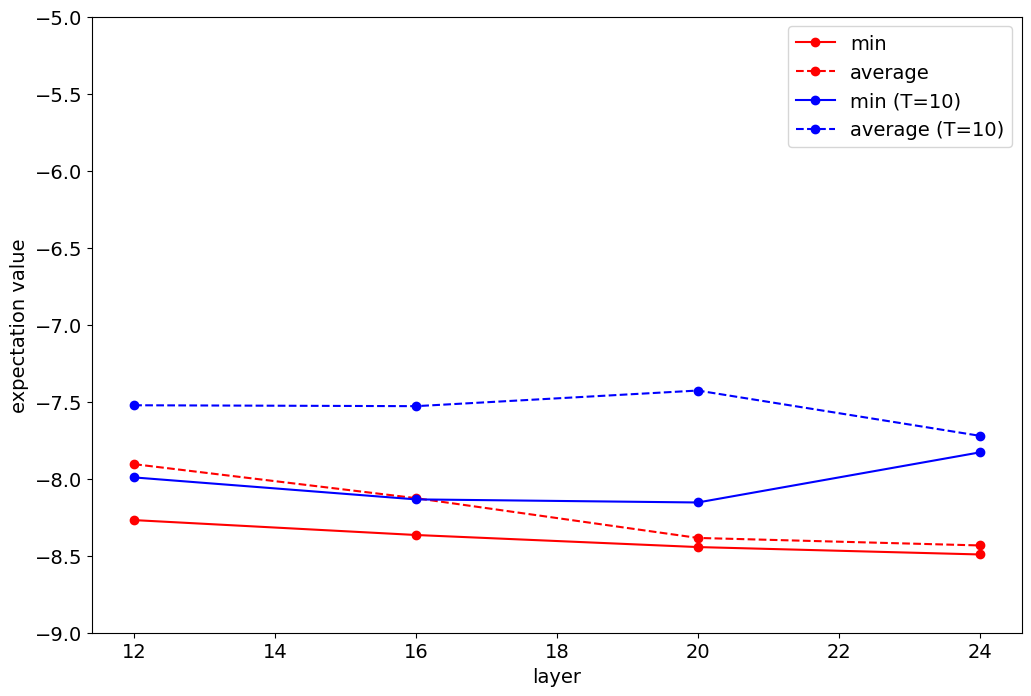

In [10]:
# initial t dependency

create_expectation_graph("")
# plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xy--1-1-None-None-false-false-None-depth'], plot_list['indirect_xy--1-1-None-None-false-false-None-cost-min'], marker='o', color='red', label='min')
plt.plot(plot_list['indirect_xy--1-1-None-None-false-false-None-depth'], plot_list['indirect_xy--1-1-None-None-false-false-None-cost-mean'], marker='o', color='red', linestyle="dashed", label='average')
plt.plot(plot_list['indirect_xy--10-10-None-None-false-false-None-depth'], plot_list['indirect_xy--10-10-None-None-false-false-None-cost-min'], marker='o', color='blue', label='min (T=10)')
plt.plot(plot_list['indirect_xy--10-10-None-None-false-false-None-depth'], plot_list['indirect_xy--10-10-None-None-false-false-None-cost-mean'], marker='o', color='blue', linestyle="dashed", label='average (T=10)')
plt.legend()
plt.savefig('./images/indirect_xy_unbounds_expectation_for_each_time.png')

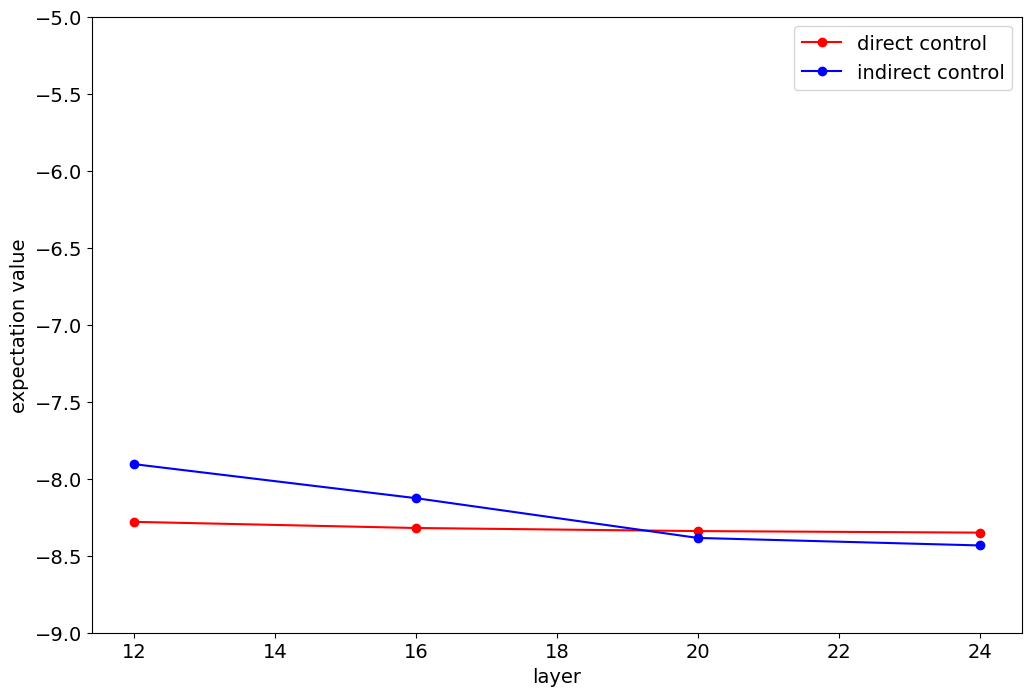

In [14]:
# compare to direct

create_expectation_graph("")
# plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot([12,16,20,24], [-8.28, -8.32, -8.34, -8.35], marker='o', color='red', label='direct control')
plt.plot(plot_list['indirect_xy--1-1-None-None-false-false-None-depth'], plot_list['indirect_xy--1-1-None-None-false-false-None-cost-mean'], marker='o', color='blue', label='indirect control')
plt.legend()
plt.savefig('./images/indirect_xy_unbounds_expectation_with_direct.png')